# Exercise 1: Rotational Diagram for Methanol $\left(\mathrm{CH}_3 \mathrm{OH}\right)$

* The Molecule Methanol has been detected in the Young Low-Mass (Class 0) Protostar IRAS 16293–2422.
* In the datafile you can find parameters associated to each detected transition, 
such a:
    * Frequencies ($ν$ in GHz)
    * Energies of the Upper Level ($E_u$ in Kelvin)
    * Einstein A-Coefficients ($A_{ul}$ in 1/sec)
    * Degeneracies ($g_u$)
    * Integrated Intensities ($W$ = $\int \mathrm{T}_{\mathrm{mb}} \mathrm{d} v$ [K * km / sec])
    * 1$\sigma$ error associated to $W$.   

* The column density of the Upper Level $N_u$ is given with the following formula.

$$\frac{N_u}{g_u}=C \frac{(\nu[\mathrm{GHz}])^2 W\left[\mathrm{~K} \mathrm{~km} \mathrm{~s}^{-1}\right]}{A_{u l}\left[\mathrm{~s}^{-1}\right] g_u}$$

$$(C = 1942.75)$$

# Q1
* Write a small program (per example in Python), to plot a diagram of $\ln(N_u/g_u)$ as a function of $E_u$.

# Answer:

In [11]:
#We import the libraries we need.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#We first get the data from our .txt file.
#Note that we made a .txt file using the .rtf file given in the assignment.
freq, E_up, A_ul, g_up, W, error = np.loadtxt("Methanol_fluxes.txt", unpack = True)

#We then define a Pandas Dataframe to store our values.
#Units of the Data are as follows:
    #Frequency => [GHz]
    #Energies of the Upper Level => [K]
    #Einstein A-Coefficient => [1/sec]
    #Degeneracy => [Unitless]
    #Integrated Intensity => [K * km / sec]
    #Error of Integrated Intensity => [Unitless]
flux_df = pd.DataFrame(columns = ["Frequency", "Energy of Upper Level", "Einstein A-Coefficient", 
                               "Degeneracy", "Integrated Intensity", "Error of Integrated Intensity"])

#We define an array that contains all the values we have.
values_list = freq, E_up, A_ul, g_up, W, error

#Now we add the values and column names to create our Pandas DataFrame.
for column, array in zip(flux_df.columns, values_list):
    flux_df[column] = array

#We print out our Pandas DataFrame
flux_df

,Frequency,Energy of Upper Level,Einstein A-Coefficient,Degeneracy,Integrated Intensity,Error of Integrated Intensity
0,241.7002,48.0,0.000058,11.0,2.67,0.83
1,241.7672,40.4,0.000056,11.0,4.36,0.97
2,241.7914,34.9,0.000058,11.0,4.91,1.03
3,241.8065,115.3,0.000021,11.0,0.72,0.46
4,241.8329,84.7,0.000037,11.0,1.99,0.75
5,241.8423,72.6,0.000049,11.0,1.97,0.77
6,241.8524,97.6,0.000037,11.0,0.61,0.44
7,241.8791,55.9,0.000056,11.0,2.29,0.78
8,241.8877,72.6,0.000049,11.0,1.67,0.82
9,241.9041,60.8,0.000049,11.0,3.28,0.91


In [3]:
#Now we need to calculate the ln(Nu/gu).
#For this we will use the formula in the given assignment.
#Nu/gu = C * (ν^2 * W) / (A_ul * g_u)
#It is given that constant C = 1942.75.
C = 1942.75

#Now we calculate our Nu/gu using the formula.
nu_gu = C * (flux_df["Frequency"] ** 2 * flux_df["Integrated Intensity"] / (flux_df["Einstein A-Coefficient"] * flux_df["Degeneracy"]))

# Take the natural logarithm (ln) of the result and put it in a new column
flux_df["ln(Nu/gu)"] = np.log(nu_gu)

# Display the DataFrame
flux_df

,Frequency,Energy of Upper Level,Einstein A-Coefficient,Degeneracy,Integrated Intensity,Error of Integrated Intensity,ln(Nu/gu)
0,241.7002,48.0,0.000058,11.0,2.67,0.83,26.879634
1,241.7672,40.4,0.000056,11.0,4.36,0.97,27.410762
2,241.7914,34.9,0.000058,11.0,4.91,1.03,27.489584
3,241.8065,115.3,0.000021,11.0,0.72,0.46,26.587974
4,241.8329,84.7,0.000037,11.0,1.99,0.75,27.032433
5,241.8423,72.6,0.000049,11.0,1.97,0.77,26.750221
6,241.8524,97.6,0.000037,11.0,0.61,0.44,25.850163
7,241.8791,55.9,0.000056,11.0,2.29,0.78,26.765986
8,241.8877,72.6,0.000049,11.0,1.67,0.82,26.583352
9,241.9041,60.8,0.000049,11.0,3.28,0.91,27.258508


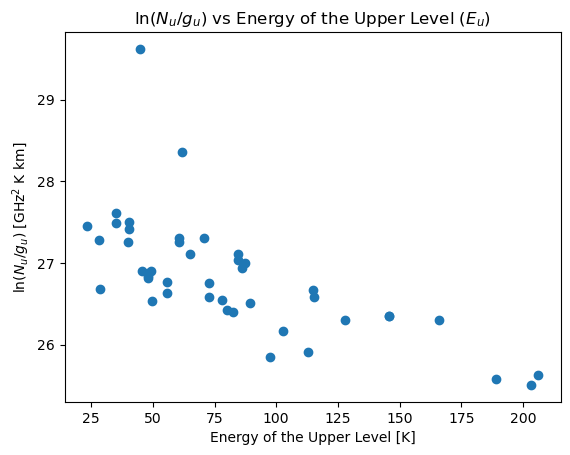

In [4]:
error_ln_Nu_gu = (1 / nu_gu) * np.sqrt((2 * flux_df["Frequency"] * flux_df["Integrated Intensity"] * flux_df["Error of Integrated Intensity"]) ** 2 +
                                       (flux_df["Frequency"] ** 2 * flux_df["Error of Integrated Intensity"] / flux_df["Integrated Intensity"]) ** 2)

#Now we plot our diagram as a function of E_u i.e. Energy of the Upper Level.
plt.figure()
plt.title(r"$\ln(N_u/g_u)$ vs Energy of the Upper Level ($E_u$)")
plt.xlabel("Energy of the Upper Level [K]")
plt.ylabel(r"$\ln(N_u/g_u)$ [GHz$^2$ K km]")
plt.errorbar(flux_df["Energy of Upper Level"], flux_df["ln(Nu/gu)"], yerr = error_ln_Nu_gu, fmt = "o")
plt.show()

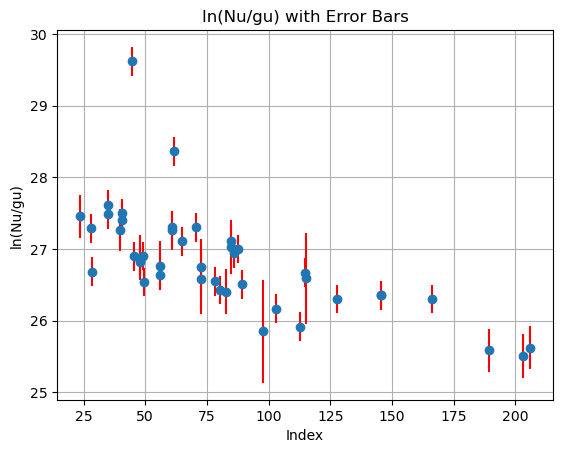

In [5]:
#Now we need to calculate the error for ln(Nu/gu) using error propagation formula
#Error for ln(Nu/gu) = (Error of Integrated Intensity / Integrated Intensity)
error_ln_Nu_gu =  flux_df["Error of Integrated Intensity"] / flux_df["Integrated Intensity"]

#Now we plot the result with error bars as follows
plt.errorbar(flux_df["Energy of Upper Level"], flux_df["ln(Nu/gu)"], yerr = error_ln_Nu_gu, fmt = "o", ecolor = "red")
plt.xlabel("Index")
plt.ylabel("ln(Nu/gu)")
plt.title("ln(Nu/gu) with Error Bars")
plt.grid(True)
plt.show()

# Q2

* Fit a Linear Function to the data.
* Obtain the values for a and b such that $\ln(N_u/g_u) = a + b E_u$.

# Answer:

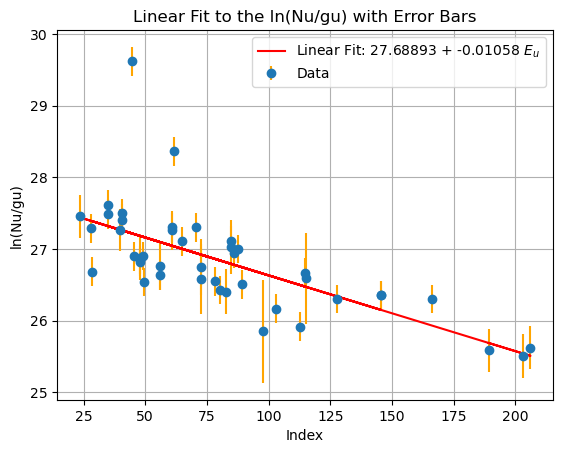

In [33]:
#We now have to define a "Linear Function"
#For this we can use the np.polyfit function.
coefficients = np.polyfit(flux_df["Energy of Upper Level"], flux_df["ln(Nu/gu)"], 1) #Degree of 1

#Since by default np.polyfit does the fitting with y = ax + b we have to get the coefficients in reverse
#due to our fit function being in the form of y = a  + bx!
b_lin, a_lin = coefficients

#We can now get the linear fit function as follows.
fit = a_lin + (b_lin * flux_df["Energy of Upper Level"])

#Now we plot and print our results.
plt.errorbar(flux_df["Energy of Upper Level"], flux_df["ln(Nu/gu)"], yerr = error_ln_Nu_gu, fmt = "o", ecolor = "orange", label = "Data")
plt.plot(flux_df["Energy of Upper Level"], fit, color = "red", label = f"Linear Fit: {round(a_lin, 5)} + {round(b_lin, 5)} $E_u$")
plt.xlabel("Index")
plt.ylabel("ln(Nu/gu)")
plt.title("Linear Fit to the ln(Nu/gu) with Error Bars")
plt.grid(True)
plt.legend()
plt.show()

# Q3

* If you consider LTE, we can write

$$\frac{N_u}{g_u}=\frac{N}{Q\left(T_{\mathrm{rot}}\right)} e^{-E_u / T_{\mathrm{rot}}}$$

* ${Q\left(T_{\mathrm{rot}}\right)}$: Partition Function

* Derive the relation between the parameter $b$ and $T_{rot}$.
* Calculate $T_{rot}$ using your results from **Q2**.

# Answer:

* We first need to derive an equation so that the $a$ and $b$ we have from the linear fit corresponds to the Right side of the formula given above.
* For this, we first take the natural logarithm ($\ln$) of both sides of the equation above.
* Note that the term $\left(-\frac{E_u}{T_{\text {Trot }}}\right)$ is due to the fact that $\ln(e^x) = x$.

$$\ln \left(\frac{N_u}{g_u}\right)=\ln \left(\frac{N}{Q(\text { Trot })}\right)\times\left(-\frac{E_u}{T_{\text {Trot }}}\right)$$

* Now we should recall the Fit Formula we have obtained from **Q2**.

$$\ln \left(\frac{N_u}{g_u}\right) = a + b E_u$$

* From here we can write $a$ and $b$ as follows.

$$a=\ln \left(\frac{N}{Q(\text { Trot })}\right)$$

$$b=-\frac{1}{T_{\text {rot }}}$$

* Using the formula we have for $b$ and the value for it we have found from Linear Fitting on **Q2**, we can find $T_{rot}$ as follows.

In [35]:
#Using the derivation we get the following:
    # a: ln(N / Q(T_rot))
    # b: -1 / T_rot

#Using this we can calculate T_rot as follows.
T_rot = - 1 / b_lin

#We print the result.
print(r"T_rot =", T_rot, "K")

T_rot = 94.48376082496104 K


# Q4

* Derive the relation between the parameter $a$ (from **Q2**) and $N$.
* Use the information given in the table below to find the Partition Function at the Rotational Temperature found in **Q3**, ${Q\left(T_{\mathrm{rot}}\right)}$.

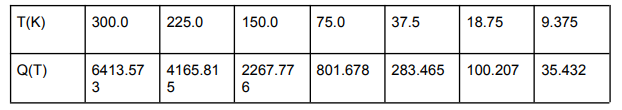

* Finally, derive the Total Column Density $N$.

# Answer:

* We already have the relation between $a$ and $N$ from our derivation in **Q3** as follows.

$$a=\ln \left(\frac{N}{Q(\text { Trot })}\right)$$

* Now we can do the fitting.

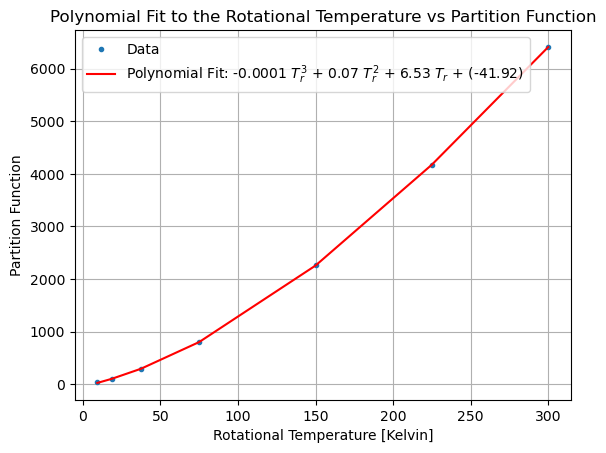

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
For the Rotational Temperature of 94.48376 Kelvin, the Partition Function is 1127.02909.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [36]:
#We first define two lists that contain the values that are given on the table.
T_rotational = np.array([300.0, 225.0, 150.0, 75.0, 37.5, 18.75, 9.375])
Parititon_func = np.array([6413.573, 4165.815, 2267.776, 801.678, 283.465, 100.207, 35.432])

#To find the Partition Function at the T_rot value we got from Q3, we have to make a fit first.
#From the fit, we can get the a and b values, using that we can find the Partition Function at that Rotational
#Temperature.
#For this we define a "3rd Degree Polynomial Function"
coefficients_new = np.polyfit(T_rotational, Parititon_func, 3) #Degree of 3

#We get the constants a, b, c, d from ax^3 + bx^2 + cx + d Polynomial Function as follows.
#Note that in this function "y" is the "Partition Function" and "x" is the "Rotational Temperature".
a, b, c, d = coefficients_new

#We can now get the linear fit function as follows.
fit = (a * (T_rotational ** 3)) + (b * (T_rotational ** 2)) + (c * (T_rotational)) + d

#Now we plot and print our results.
plt.plot(T_rotational, Parititon_func, ".", label = "Data")
plt.plot(T_rotational, fit, color = "red", 
         label = f"Polynomial Fit: {round(a, 4)} $T_r^3$ + {round(b, 2)} $T_r^2$ + {round(c, 2)} $T_r$ + ({round(d, 2)})")
plt.xlabel("Rotational Temperature [Kelvin]")
plt.ylabel("Partition Function")
plt.title("Polynomial Fit to the Rotational Temperature vs Partition Function")
plt.grid(True)
plt.legend()
plt.show()

#We can now find the value for the Partition Function at the Rotational Temperature we have obtained from Q3
#as follows.
partition_function = (a * (T_rot** 3)) + (b * (T_rot ** 2)) + (c * (T_rot)) + d
print(100 * "~")
print(f"For the Rotational Temperature of {round(T_rot, 5)} Kelvin, the Partition Function is {round(partition_function, 5)}.")
print(100 * "~")

* Now that we know $Q(T_{rot})$ we can find the Total Column Density $N$ by using the formula below.

$$a=\ln \left(\frac{N}{Q(\text { Trot })}\right)$$

* Rearranging this formula for $N$ would give us the following formula.
* Note that $a$ is the coefficient we have obtained from Linear Fit we have done on **Q2**.

$$N = e^a \times Q(T_{rot})$$

* We can find the Total Column Density for the Given Rotational Temperature as follows.

In [39]:
#We calculate the Total Column Density.
N = np.exp(a_lin) * partition_function

#We print our results.
print(100 * "~")
print(f"For the Partition Function of {round(partition_function, 5)}, the Total Column Density is {round(N, 5)} [GHz^2 K km].")
print(100 * "~")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
For the Partition Function of 1127.02909, the Total Column Density is 1194218756580415.8 [GHz^2 K km].
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


# Exercise 2: Making $\mathrm{ArH}^{+}$ in the ISM

* $\mathrm{ArH}^{+}$was the first molecule containing a noble gas element detected in the ISM (Barlow et al. 2013, Science, 342,134).
* It is considered a good tracer of neutral gas.

* The most important reactions involved in the formation of $\mathrm{ArH}^{+}$ are as follows.

$$
\begin{gather*}
\mathrm{Ar}+\mathrm{CR} \xrightarrow{k_{1}} \mathrm{Ar}^{+}+\mathrm{e}^{-}  \tag{1}\\
\mathrm{Ar}+\mathrm{H}_{2}^{+} \xrightarrow{k_{2}} \mathrm{Ar}^{+}+\mathrm{H}_{2}  \tag{2}\\
\mathrm{Ar}+\mathrm{H}_{3}^{+} \xrightarrow{k_{3}} \mathrm{ArH}^{+}+\mathrm{H}_{2}  \tag{3}\\
\mathrm{Ar}^{+}+\mathrm{e}^{-} \xrightarrow{k_{4}} \mathrm{Ar}^{+} h \nu  \tag{4}\\
\mathrm{Ar}^{+}+\mathrm{H}_{2} \xrightarrow{k_{5}} \mathrm{ArH}^{+}+\mathrm{H}  \tag{5}\\
\mathrm{ArH}^{+}+\mathrm{H}_{2} \xrightarrow{k_{6}} \mathrm{Ar}+\mathrm{H}_{3}^{+}  \tag{6}\\
\mathrm{ArH}^{+}+\mathrm{CO} \xrightarrow{k_{7}} \mathrm{Ar}+\mathrm{HCO}^{+}  \tag{7}\\
\mathrm{ArH}^{+}+\mathrm{O} \xrightarrow{k_{8}} \mathrm{Ar}+\mathrm{OH}^{+}  \tag{8}\\
\mathrm{ArH}^{+}+\mathrm{C} \xrightarrow{k_{9}} \mathrm{Ar}+\mathrm{CH}^{+}  \tag{9}\\
\mathrm{ArH}^{+}+\mathrm{e}^{-} \xrightarrow{k_{10}} \mathrm{Ar}+\mathrm{H}  \tag{10}\\
\mathrm{ArH}^{+}+h \nu \xrightarrow{k_{11}} \mathrm{Ar}++\mathrm{H} \tag{11}
\end{gather*}$$

# Q1

* Classify each type of reactions above.

# Answer:

$\mathrm{Ar}+\mathrm{CR} \xrightarrow{k_{1}} \mathrm{Ar}^{+}+\mathrm{e}^{-}$: **Associative Detachment**

$\mathrm{Ar}+\mathrm{H}_{2}^{+} \xrightarrow{k_{2}} \mathrm{Ar}^{+}+\mathrm{H}_{2}$: **Charge Transfer Reaction**

$\mathrm{Ar}+\mathrm{H}_{3}^{+} \xrightarrow{k_{3}} \mathrm{ArH}^{+}+\mathrm{H}_{2}$: **Ion - Molecule Reaction**

$\mathrm{Ar}^{+}+\mathrm{e}^{-} \xrightarrow{k_{4}} \mathrm{Ar}^{+} + h \nu$: **Radiative Association**

$\mathrm{Ar}^{+}+\mathrm{H}_{2} \xrightarrow{k_{5}} \mathrm{ArH}^{+}+\mathrm{H}$: **Ion - Molecule Reaction**

$\mathrm{ArH}^{+}+\mathrm{H}_{2} \xrightarrow{k_{6}} \mathrm{Ar}+\mathrm{H}_{3}^{+}$: **Ion - Molecule Reaction**

$\mathrm{ArH}^{+}+\mathrm{CO} \xrightarrow{k_{7}} \mathrm{Ar}+\mathrm{HCO}^{+}$: **Ion - Molecule Reaction**

$\mathrm{ArH}^{+}+\mathrm{O} \xrightarrow{k_{8}} \mathrm{Ar}+\mathrm{OH}^{+}$: **Ion - Molecule Reaction**

$\mathrm{ArH}^{+}+\mathrm{C} \xrightarrow{k_{9}} \mathrm{Ar}+\mathrm{CH}^{+}$: **Ion - Molecule Reaction**

$\mathrm{ArH}^{+}+\mathrm{e}^{-} \xrightarrow{k_{10}} \mathrm{Ar}+\mathrm{H}$: **Dissociative Recombination**

$\mathrm{ArH}^{+}+h \nu \xrightarrow{k_{11}} \mathrm{Ar}^{+} +\mathrm{H}$: **Photodissociation**

# Q2

* Write the Ordinary Differential Equation (ODE) that describes the evolution of [$ArH^{+}$] as function of time.
* **TIP:** Consider only the reactions that create and destroy $ArH^{+}$.

# Answer:

* We can first write down only the reactions that create and destroy $ArH^{+}$ as follows.

$$
\begin{gather*}
\mathrm{Ar}+\mathrm{H}_{3}^{+} \xrightarrow{k_{3}} \mathrm{ArH}^{+}+\mathrm{H}_{2}  \tag{3}\\
\mathrm{Ar}^{+}+\mathrm{H}_{2} \xrightarrow{k_{5}} \mathrm{ArH}^{+}+\mathrm{H}  \tag{5}\\
\mathrm{ArH}^{+}+\mathrm{H}_{2} \xrightarrow{k_{6}} \mathrm{Ar}+\mathrm{H}_{3}^{+}  \tag{6}\\
\mathrm{ArH}^{+}+\mathrm{CO} \xrightarrow{k_{7}} \mathrm{Ar}+\mathrm{HCO}^{+}  \tag{7}\\
\mathrm{ArH}^{+}+\mathrm{O} \xrightarrow{k_{8}} \mathrm{Ar}+\mathrm{OH}^{+}  \tag{8}\\
\mathrm{ArH}^{+}+\mathrm{C} \xrightarrow{k_{9}} \mathrm{Ar}+\mathrm{CH}^{+}  \tag{9}\\
\mathrm{ArH}^{+}+\mathrm{e}^{-} \xrightarrow{k_{10}} \mathrm{Ar}+\mathrm{H}  \tag{10}\\
\mathrm{ArH}^{+}+h \nu \xrightarrow{k_{11}} \mathrm{Ar}^++\mathrm{H} \tag{11}
\end{gather*}$$

* Now we can write the Ordinary Differential Equation (ODE) in a simple way.
* To write the ODE we will give a "+" sign for the reactions that create $ArH^{+}$ and give a "-" sign for the reactions that destroy $ArH^{+}$.
* Note that the $k$ terms represent the "Rate" of the reactions.
* Using all of these, we can write the ODE for the evolution of $ArH^{+}$ as a function of time as follows.

$$\frac{{d[\mathrm{ArH}^+]}}{{dt}} = + k_3[\mathrm{Ar}][\mathrm{H}_3^+] + k_5[\mathrm{Ar}^+][\mathrm{H}_2]$$
$$- k_6[\mathrm{ArH}^+][\mathrm{H}_2] - k_7[\mathrm{ArH}^+][\mathrm{CO}] - k_8[\mathrm{ArH}^+][\mathrm{O}]$$ 
$$- k_9[\mathrm{ArH}^+][\mathrm{C}] - k_{10}[\mathrm{ArH}^+][\mathrm{e}^-] - k_{11}[\mathrm{ArH}^+][h\nu]$$

* **In Here:** (Note: The word "destroy" **does not define the reaction type!**)
    * $k_3[\mathrm{Ar}][\mathrm{H}_3^+]$: Creates $ArH^{+}$ by using $Ar$ and ${H}_3^+$ hence the "+" sign.
    * $k_5[\mathrm{Ar}^+][\mathrm{H}_2]$: Creates $ArH^{+}$ by using $Ar^+$ and ${H}_2$ hence the "+" sign.
    * $k_6[\mathrm{ArH}^+][\mathrm{H}_2]$: Destroys $ArH^{+}$ hence the "-" sign.
    * $k_7[\mathrm{ArH}^+][\mathrm{CO}]$: Destroys $ArH^{+}$ hence the "-" sign.
    * $k_8[\mathrm{ArH}^+][\mathrm{O}]$: Destroys $ArH^{+}$ hence the "-" sign.
    * $k_9[\mathrm{ArH}^+][\mathrm{C}]$: Destroys $ArH^{+}$ hence the "-" sign.
    * $k_{10}[\mathrm{ArH}^+][\mathrm{e}^-]$: Destroys $ArH^{+}$ hence the "-" sign.
    * $k_{11}[\mathrm{ArH}^+][h\nu]$: Destroys $ArH^{+}$ hence the "-" sign.

# Q3

* Among the reactions related to $ArH^{+}$, the most important according to Schilke et al (A&A, 566, A29) are the following:

$$
\begin{gather*}
\mathrm{Ar}+\mathrm{CR} \xrightarrow{k_{1}} \mathrm{Ar}^{+}+\mathrm{e}^{-}  \tag{1}\\
\mathrm{Ar}^{+}+\mathrm{H}_{2} \xrightarrow{k_{5}} \mathrm{ArH}^{+}+\mathrm{H}  \tag{5}\\
\mathrm{ArH}^{+}+\mathrm{H}_{2} \xrightarrow{k_{6}} \mathrm{Ar}+\mathrm{H}_{3}^{+}  \tag{6}\\
\mathrm{ArH}^{+}+\mathrm{O} \xrightarrow{k_{8}} \mathrm{Ar}+\mathrm{OH}^{+}  \tag{8}\\
\mathrm{ArH}^{+}+h \nu \xrightarrow{k_{11}} \mathrm{Ar}^++\mathrm{H} \tag{11}
\end{gather*}$$

* Assuming conditions of Steady State ($dn/dt = 0$), derive the following expression for the Abundance Ratio of $ArH^+$ and $Ar$ in the diffuse ISM:

$$
\frac{n\left(\mathrm{ArH}^{+}\right)}{n(\mathrm{Ar})}=\frac{\zeta(A r)}{k_{6} n\left(\mathrm{H}_{2}\right)+k_{8} n(\mathrm{O})}
$$

* In here ${\zeta(A r)}=k_1$ is the Cosmic Ray Ionization Rate of $Ar$.

* **TIP:** You need the expressions describing the Steady-State Abundances of both $ArH^+$ and $Ar^+$.

# Answer:

* For this, we can do the following.

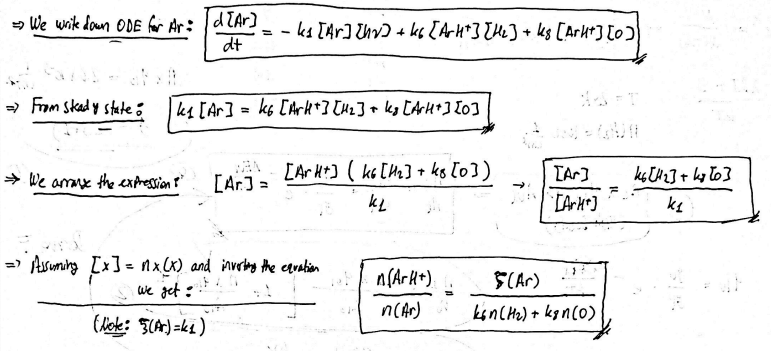

# Q4

* Consider now a Diffuse Cloud with the following properties.

$$
\begin{aligned}
k_{1} & =11.4 \zeta_{p}(\mathrm{H}) \mathrm{s}^{-1} \\
k_{6} & =8.0 \times 10^{-10} \mathrm{~cm}^{3} \mathrm{~s}^{-1} \\
k_{8} & =8.0 \times 10^{-10} \mathrm{~cm}^{3} \mathrm{~s}^{-1} \\
\zeta_{p}(\mathrm{H}) & =2.0 \times 10^{-16} \mathrm{~s}^{-1} \\
n(\mathrm{O}) & =2.9 \times 10^{-4} n_{\mathrm{H}} \\
n(\mathrm{Ar}) & =3.2 \times 10^{-6} n_{\mathrm{H}}
\end{aligned}
$$

* a) Write an expression that tells how the Abundance of $ArH^+$ changes as a function of the Logarithmic Molecular Abundance of $H_2$ that is $\left[\mathrm{H}_{2}\right]=\log _{10}\left(2 \mathrm{n}\left(\mathrm{H}_{2}\right) /\mathrm{nH}\right)$.

* b) Evaluate how $[ArH^+]$ changes for the following values of $\left[\mathrm{H}_{2}\right]=\log _{10}\left(2 \mathrm{n}\left(\mathrm{H}_{2}\right) /\mathrm{nH}\right)$: $-1.0$, $-2.5$, $-4.0$.

* c) Make a plot of how $[ArH^+]$ changes as a function of $\left[\mathrm{H}_{2}\right]=\log _{10}\left(2 \mathrm{n}\left(\mathrm{H}_{2}\right) /\mathrm{nH}\right)$. How can we conclude that $ArH^+$ is a good tracer of atomic gas? (**TIP**: Density is the key!)

# Answer:

# a)

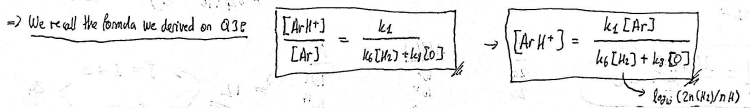

# b)

* For this and the other part, we will code our results.

In [1]:
#We first define the expression we have as a function.
def ArH_expression(k1, Ar, k6, H2, k8, O):
    """
    Takes k1, k6, k8 Reaction Rates alongside the Ar, H_2 (molecular hydrogen), O abundances. Returns the
    amount of ArH^+ from the reactions.

    Input:
    ------------------------------------------------------------------------------------
    k1: Cosmic Ray Ionization Rate or Ar.
    Ar: Argon Abundance
    k6: Reaction rate of Reaction (6)
    H2: Molecular Hydrogen Abundance
    k8: Reaction Rate of Reaction (8)
    O: Oxygen Abundance
    
    Output:
    -------------------------------------------------------------------------------------
    ArH_value: The abundance of ArH^+, calculated from the Reaction Rates and Abundances.
    
    """

    #We define our expression.
    ArH_value = (k1 * Ar) / ((k6 * H2) + (k8 * O))

    return ArH_value

In [14]:
#Now we define the values we have from the question.
#Note that "n_H" on Ar and O expressions in the question cancel each other out on the expression.
k1 = 11.4 * 2.0e-16
Ar = 3.2e-6
k6 = 8.0e-10
O = 2.9e-4
k8 = 8.0e-10

#We now define an array consisting of the H_2 values given in the question.
H2_values = [-1.0, -2.5, -4.0]

#We can now print the ArH values as follows.
print(60 * "~")
for H2_value in H2_values:
    ArH = ArH_expression(k1, Ar, k6, H2_value, k8, O)
    print(60 * "-")
    print(r"ArH⁺ value for H₂ =", H2_value, "is:", ArH)
    print(60 * "-")

print(60 * "~")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
------------------------------------------------------------
ArH⁺ value for H₂ = -1.0 is: -9.122645567214492e-12
------------------------------------------------------------
------------------------------------------------------------
ArH⁺ value for H₂ = -2.5 is: -3.648423217093183e-12
------------------------------------------------------------
------------------------------------------------------------
ArH⁺ value for H₂ = -4.0 is: -2.280165311985119e-12
------------------------------------------------------------
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


# c)

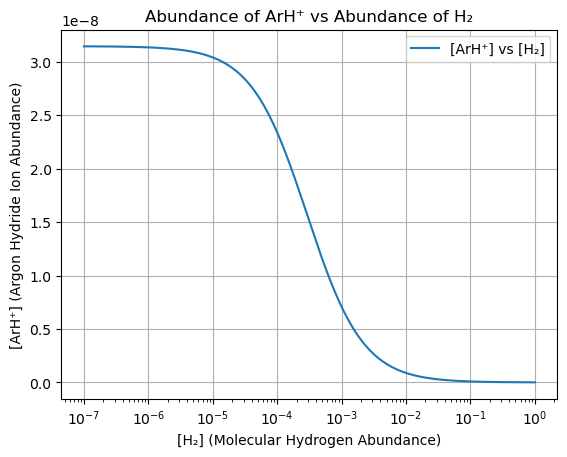

In [22]:
#We define a H2 value array consisting of various values.
H2_values_list = np.logspace(-7, 0, 1000)

#We define the function so that it takes these H2 values as an input.
ArH_values_plot = ArH_expression(k1, Ar, k6, H2_values_list, k8, O)

#We now plot the results.
plt.plot(H2_values_list, ArH_values_plot, label="[ArH⁺] vs [H₂]")
plt.xscale("log")
plt.xlabel("[H₂] (Molecular Hydrogen Abundance)")
plt.ylabel("[ArH⁺] (Argon Hydride Ion Abundance)")
plt.title("Abundance of ArH⁺ vs Abundance of H₂")
plt.legend()
plt.grid(True)
plt.show()

* **Why is $ArH^+$ a good tracer of Atomic Gas?**
    * In high density regions we can say that the abundance of $H$ is higher.
    * Since the production of $ArH^+$ also depends on $H$ i.e. Atomic Hydrogen, the amount of $ArH^+$ in the medium could give us an idea on the amount of Atomic Hydrogen present in the Medium.
    * Similarly, when there is low abundance of $H$ in the Medium, the amount of $ArH^+$ in the medium also tends to be lower.